# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План работы**
<br>
Изучем данные
<br>
Проведем их предобработку
<br>
Проведем анализ и выбирем актуальные данные
<br>
Составим портрет пользователя по регионам
<br>
Проверем гипотезы
<br>
Напишем вывод

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#проверем на дубликаты
games.duplicated().sum()

0

# Шаг 2. Подготовьте данные

In [6]:
games.columns = games.columns.str.lower() #Замените названия столбцов (приведите к нижнему регистру)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Поменяем тип данных столбцу 'user_score' так как там значение числовое, а тип стоит object. Еще там есть аббревиатура 'tbd', что значит скорее всего что оценка не определена, возможно для формирования оценки не достаточно данных. Для нас это равносильно отсутствию оценки, поэтому заменим все 'tbd' на nan.

In [8]:
 games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [9]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [11]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Поменяли еще тип данных столбцу 'year_of_release' на целочислиный.

Пропуски могли повится или из-за ошибки выгрузки данных или из-за человеческого фактора, а может не заполнены намерено. Разберем поподробнее и обработаем их.

Удалим пропуски из столбцов 'name' и 'genre', потому что это всего 2 строки и никак не повлияет на общие данные.

In [12]:
games.dropna(subset=['name'], inplace=True)
games.reset_index(inplace=True,drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Также удалим строки в столбце 'year_of_release', так как их тоже немного и в дальнейшем мы будем активно работать с годом выпуска. В остальных столбцах имеются пропуски но заплнять их не будем, так как это может исказить данные и возможности их чем-то заполнить нет.

In [13]:
games.dropna(subset=['year_of_release'], inplace=True)
games.reset_index(inplace=True,drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [15]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# Шаг 3. Проведите исследовательский анализ данных

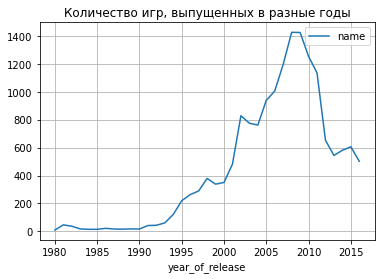

In [16]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, title='Количество игр, выпущенных в разные годы');

По графику видно что начиная с 1990 года начался бурный рост выпуска игр, который продолжался примерно до 2008 года. После начался спад. Думаю данные важны где-то за последние 10 лет, чтобы учитывать последние тренды.

In [17]:
#отсортируеми по продажам
sales_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [18]:
#выбирем 10 самых продоваемых и посмотрим распределение по годам
best_sales_platform = list(sales_platform.index[:10])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

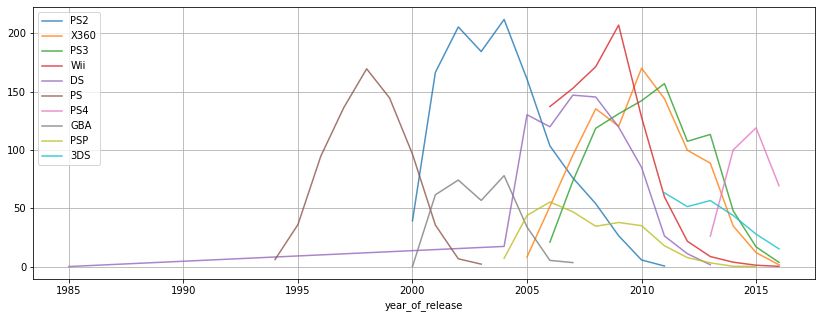

In [19]:
#постройте распределение по годам
mean_year_life = 0
for i in range(0,len(best_sales_platform)):
    platform  = games.query('platform == @best_sales_platform[@i]').groupby('year_of_release')['total_sales'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, label=best_sales_platform[i], alpha=0.8, grid=True, figsize=(14,5));
plt.legend();

По графику видно что примерный срок жизни платформы где-то 10 лет. Но это с учетом фазы роcта в начале и падения в конце.
Также мы видели что после 2008 года началось падение выпуска игр.

In [20]:
#Возьмите данные за соответствующий актуальный период
new_games = games[games['year_of_release'] > 2011]
new_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


<AxesSubplot:xlabel='year_of_release'>

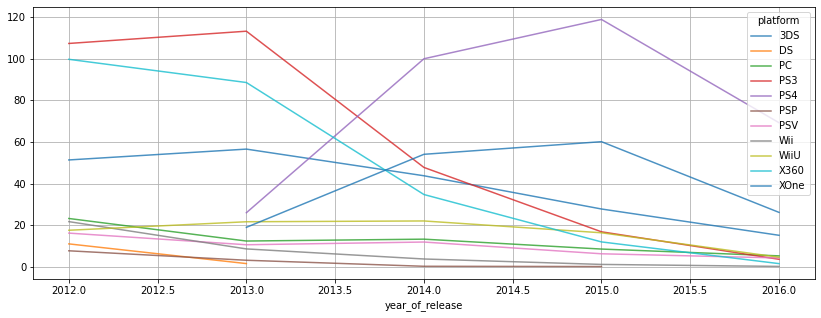

In [21]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ
new_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(alpha=0.8, grid=True, figsize=(14,5))

Все платформы падают по прадажам. Учитывая тенденции последних лет потенциально прибыльными можно считать PS4, XOne, 3DS.

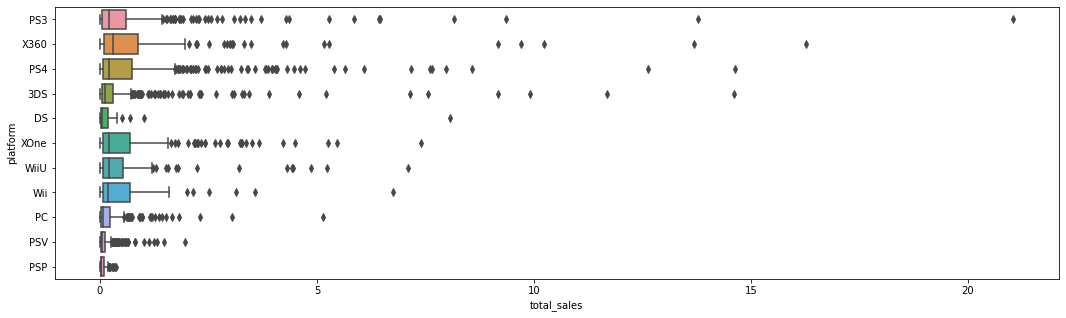

In [22]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(18,5))
sns.boxplot(data=new_games, x='total_sales', y='platform');

(0.0, 2.0)

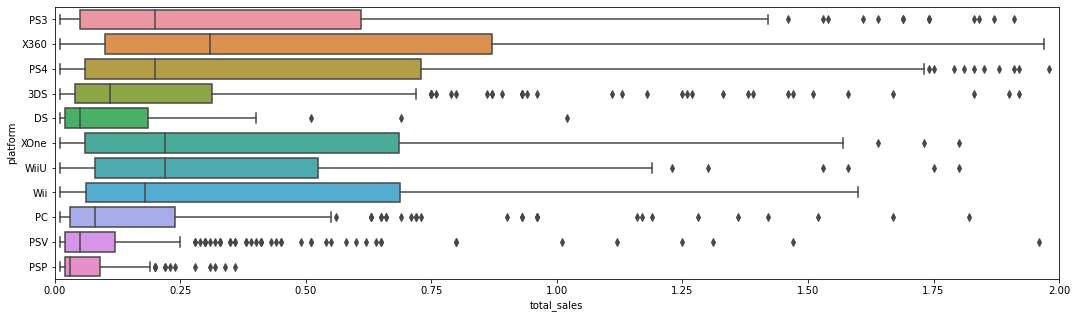

In [23]:
plt.figure(figsize=(18,5))
sns.boxplot(data=new_games, x='total_sales', y='platform');
plt.xlim(0,2)

Судя по графику у нас много выбросов, которые сильно отличаютя от медианы.

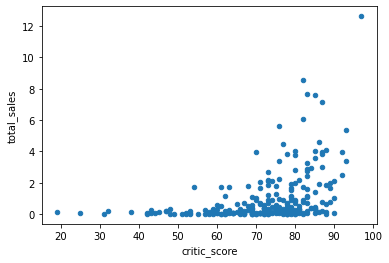

In [24]:
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами
new_games[new_games.platform == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter');

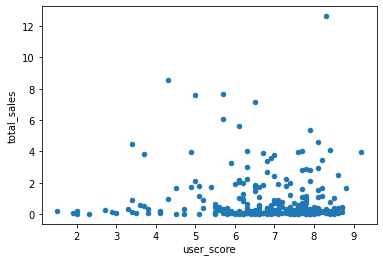

In [25]:
new_games[new_games.platform == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter');

In [26]:
new_games[new_games.platform == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Зависимость продаж от оценки критиков есть, но оная слабая.

'3DS'

,total_sales,critic_score,user_score
total_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


'PC'

,total_sales,critic_score,user_score
total_sales,1.000000,0.237243,-0.121867
critic_score,0.237243,1.000000,0.432587
user_score,-0.121867,0.432587,1.000000


'PS3'

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


'PS4'

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


'X360'

,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


'XOne'

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


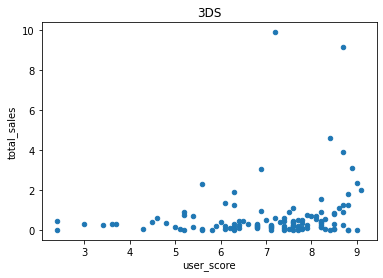

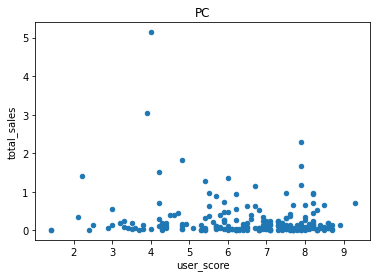

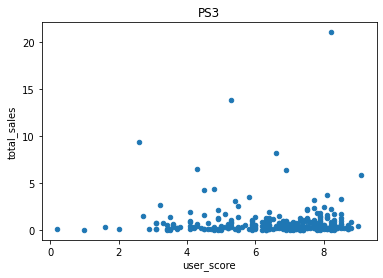

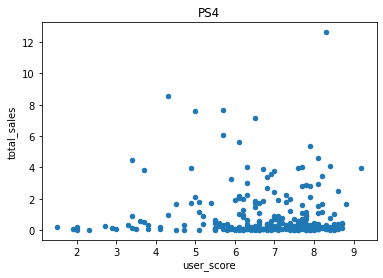

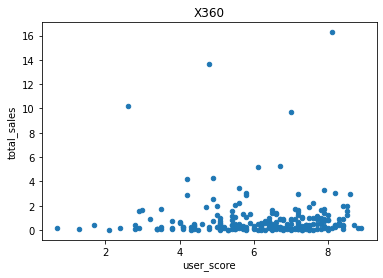

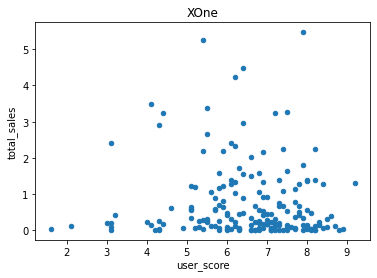

In [27]:
spicok = ['3DS', 'PC', 'PS3', 'PS4', 'X360', 'XOne']
for platform in spicok:
    new_games.query('platform == @platform').plot(x='user_score', y='total_sales', kind='scatter', title=platform)
    display(platform, new_games.query('platform == @platform')[['total_sales', 'critic_score', 'user_score']].corr())

На других популярных платформах зависимость от оценок критиков такая же слабая.

In [28]:
#Посмотрите на общее распределение игр по жанрам
new_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [29]:
new_games.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


Самые популярный жанр по сумарным продажам Action, затем идет Shooter и Role-Playing. По медианным значениям это Shooter, Platform, Sports.

# Шаг 4. Составьте портрет пользователя каждого региона

In [30]:
#Самые популярные платформы (топ-5).
sale_na_p = new_games.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head()
sale_na_p

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [31]:
sale_eu_p = new_games.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
sale_eu_p

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [32]:
sale_jp_p = new_games.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
sale_jp_p

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


<AxesSubplot:xlabel='platform'>

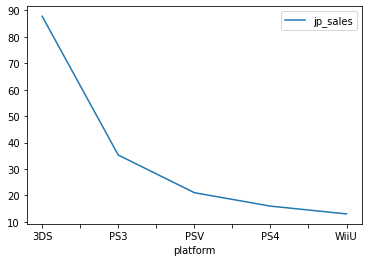

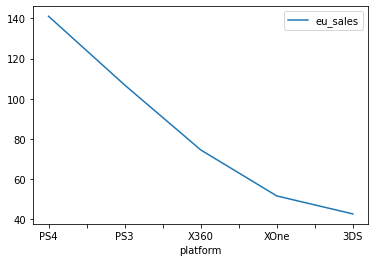

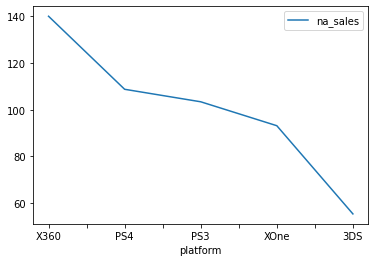

In [33]:
sale_jp_p.plot()
sale_eu_p.plot()
sale_na_p.plot()

По графикам видно что больше всего покупают в Северной Амереке, также там самая популярная X360. В Европе PS4, а в Японии 3DS. 

In [34]:
#Самые популярные жанры (топ-5)
sale_na_g = new_games.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head()
sale_na_g

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [35]:
sale_eu_g = new_games.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
sale_eu_g

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [36]:
sale_jp_g = new_games.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
sale_jp_g

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


В Европе и Северной Амереки популярные жанры срвподают. В Японии самый популярный жанр Role-Playing.

In [37]:
import warnings
warnings.filterwarnings("ignore")
#рейтинг ESRB,заменим пропущенные значения
new_games['rating'] = new_games['rating'].replace(np.NaN, 'без рейтинга')

In [38]:
new_games['rating'].unique()

array(['M', 'без рейтинга', 'E', 'E10+', 'T'], dtype=object)

In [39]:
sale_na_r = new_games.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(6)
sale_na_r

,na_sales
rating,
M,231.57
E,114.37
без рейтинга,103.31
E10+,75.70
T,66.02


In [40]:
sale_eu_r = new_games.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
sale_eu_r

,eu_sales
rating,
M,193.96
E,113.03
без рейтинга,91.50
E10+,55.37
T,52.96


In [41]:
sale_jp_r = new_games.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
sale_jp_r

,jp_sales
rating,
без рейтинга,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


In [42]:
temp = new_games.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


без рейтинга    1275
M                498
T                412
E                395
E10+             306
Name: rating, dtype: int64

Можно заметить что продажи от рейтинга зависят, в Европе и Северной Амереке распределение продаж по рейтенгу совпадает. В Японии координально отличяется, так как там скорее всего своя класификация, и это видно по продажам игр без рейтинга.

# Шаг 5. Проверьте гипотезы

Проверка первой гипотезы.
Сформулируем нулевую гепотезу и альтернативную. H0 всегда формулируется так,чтобы использовать знак равенства.
Поэтому нулевая гипотеза звучит так:средние пользовательские рейтинги платформ Xbox One и PC равны.
Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [43]:
XOne = new_games[new_games['platform']=='XOne']['user_score'].dropna()
PC = new_games[new_games['platform']=='PC']['user_score'].dropna()

Для проверки гипотезы о равенстве среднего двухгенеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind(), так что воспользуемся им.

In [44]:
results = st.ttest_ind(XOne,PC)
results.pvalue

0.5535080500643661

In [45]:
alpha = 0.05
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, данные не протеворечат этой гипотезе.

Проверка второй гипотезы. Сформулируем нулевую гепотезу и альтернативную. H0 всегда формулируется так,чтобы использовать знак равенства. Поэтому нулевая гипотеза звучит так: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Альтернативная: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [46]:
Action = new_games[new_games['genre']=='Action']['user_score'].dropna()
Sports = new_games[new_games['genre']=='Sports']['user_score'].dropna()

In [47]:
results1 = st.ttest_ind(Action,Sports)
results1.pvalue

3.7163089460934874e-26

In [48]:
if (results1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, данные не протеворечат этой гипотезе

# Шаг 6. Напишите общий вывод

В ходе работы были предобработаны данные: 
<br>
изменены названия и типы данных столбцов где это было необходимо. 
<br>
обработаны пропуски и созданы столбцы необходимые в дальнейшем.
<br>
В ходе анализа были отброшены слишком старые данные и учтен примерный жизненый цикл платформы.
<br>
После анализа потенциально прибыльными и на которые можно расчитывать в будущем можно платформы: PS4, XOne, 3DS  PC PS3, X360.
<br>
Cамые популярные жанры со стабильным спросом Shooter и Sports. А рейтинг М и Е, но надо учитывать игры произведенные в других странах и не имеющие рейтинга ESRB.